In [1]:
!pip install  scikit-fuzzy --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=b2b9f51d20e29e127d223d4a87b3bdc8015a60362e2ba702594cb70de4efbd56
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import skfuzzy 
skfuzzy.__version__

'0.4.2'

In [3]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [8]:
# the second part 
# database treatment
base = pd.read_csv("Credit_Card_Clients.csv" )
base.shape

(30000, 25)

In [9]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [45]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] +base['BILL_AMT5'] + base['BILL_AMT6']

In [46]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TITAL,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,109339.0


In [47]:
X = base.iloc[: , [1,25]].values

In [48]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [51]:
r= skfuzzy.cmeans(data = X.T, c = 3 , m =  2 , error = 0.005 ,maxiter= 1000 ,init = None  ) 

In [52]:
r

(array([[ 0.97536078, -0.42055295],
        [-0.73888657, -0.30174127],
        [ 0.74970557,  2.01633004]]),
 array([[0.06225532, 0.12402333, 0.01586464, ..., 0.03497412, 0.02980707,
         0.0180136 ],
        [0.9118176 , 0.84865158, 0.979145  , ..., 0.95010614, 0.95613052,
         0.97292077],
        [0.02592708, 0.0273251 , 0.00499035, ..., 0.01491974, 0.01406241,
         0.00906564]]),
 array([[0.37053404, 0.39430311, 0.21071177, ..., 0.45251476, 0.69389386,
         0.14979669],
        [0.26616657, 0.15857107, 0.09752062, ..., 0.18938078, 0.14933321,
         0.15132574],
        [0.36329939, 0.44712582, 0.69176761, ..., 0.35810446, 0.15677293,
         0.69887758]]),
 array([[2.12928648, 1.36361264, 1.5727258 , ..., 2.03769879, 1.70030505,
         1.9075244 ],
        [0.55637596, 0.52128833, 0.20019105, ..., 0.39095551, 0.30021189,
         0.2595563 ],
        [3.2994803 , 2.90510521, 2.80415778, ..., 3.11984307, 2.47546397,
         2.68887837]]),
 array([25876.528835

In [53]:
percentage_forecasts = r[1]

In [54]:
percentage_forecasts.shape

(3, 30000)

In [55]:
percentage_forecasts

array([[0.06225532, 0.12402333, 0.01586464, ..., 0.03497412, 0.02980707,
        0.0180136 ],
       [0.9118176 , 0.84865158, 0.979145  , ..., 0.95010614, 0.95613052,
        0.97292077],
       [0.02592708, 0.0273251 , 0.00499035, ..., 0.01491974, 0.01406241,
        0.00906564]])

In [56]:
percentage_forecasts[0][0]

0.062255323213410034

In [57]:
percentage_forecasts[1][0]

0.9118175967837544

In [58]:
percentage_forecasts[2][0]

0.025927080002835466

In [59]:
percentage_forecasts[0][0] + percentage_forecasts[1][0] + percentage_forecasts[2][0]

0.9999999999999999

In [60]:
forecast = percentage_forecasts.argmax(axis = 0)

In [61]:
forecast

array([1, 1, 1, ..., 1, 1, 1])

In [62]:
forecast.shape

(30000,)

In [63]:
forecast[420:]

array([1, 2, 0, ..., 1, 1, 1])

In [64]:
forecast[30:]

array([0, 1, 1, ..., 1, 1, 1])

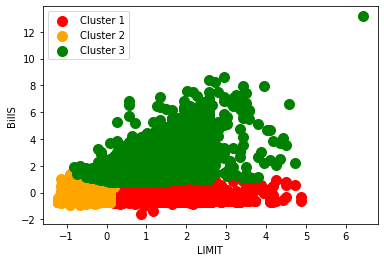

In [69]:
plt.scatter(X[forecast == 0 , 0 ] , X[forecast == 0 , 1] , s = 100 ,c = 'red' ,label = 'Cluster 1')
plt.scatter(X[forecast == 1 , 0 ] , X[forecast == 1 , 1] , s = 100 ,c = 'orange' ,label = 'Cluster 2')
plt.scatter(X[forecast == 2 , 0 ] , X[forecast == 2 , 1] , s = 100 ,c = 'green' ,label = 'Cluster 3')
plt.xlabel('LIMIT')
plt.ylabel('BillS')
plt.legend()